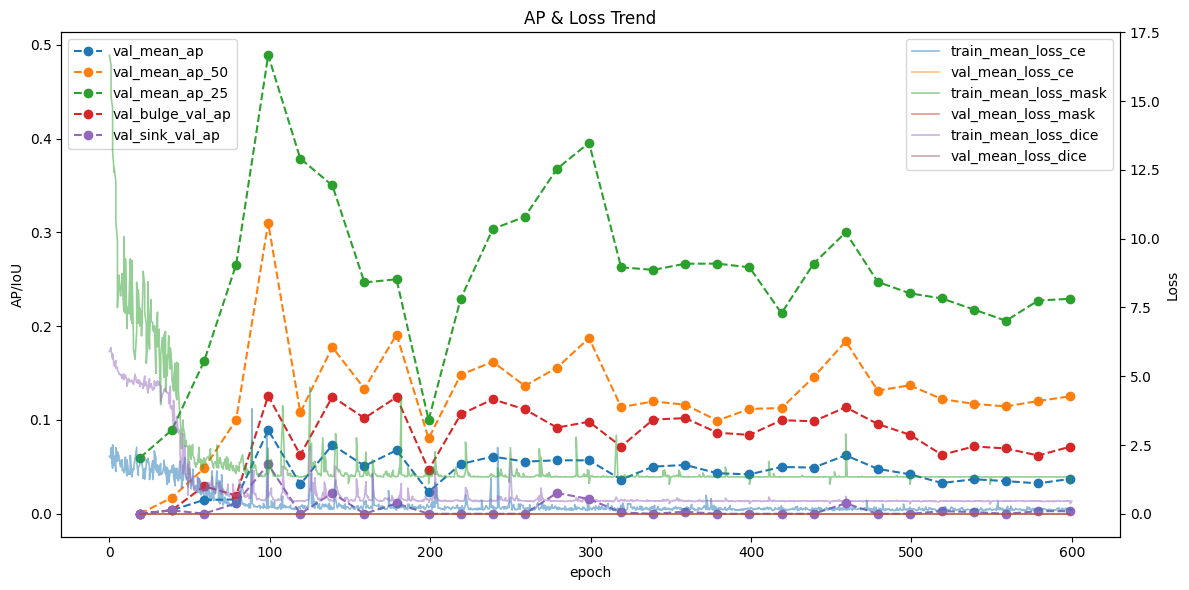

In [16]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# 1. 设置实验目录（包含 metrics.csv 的目录）
exp_dir = "./saved/real3dad_exp1/real3dad_exp1/version_0"  # 修改为你的路径

metrics_path = os.path.join(exp_dir, "metrics.csv")
assert os.path.exists(metrics_path), f"找不到 {metrics_path}"

# 2. 加载数据
df = pd.read_csv(metrics_path)

# 3. 指定你关心的可视化指标（自动筛选所有AP、loss相关列）
key_metrics = [col for col in df.columns if "ap" in col or "loss" in col]
show_metrics = [
    "val_mean_ap", "val_mean_ap_50", "val_mean_ap_25", 
    "val_bulge_val_ap", "val_sink_val_ap",
    "train_mean_loss_ce", "val_mean_loss_ce", 
    "train_mean_loss_mask", "val_mean_loss_mask", 
    "train_mean_loss_dice", "val_mean_loss_dice"
]
# 若列不存在则自动过滤
show_metrics = [m for m in show_metrics if m in df.columns]

# 4. 绘图（AP指标/损失分开Y轴，支持步进或epoch横轴，自动去除全NaN列）
fig, ax1 = plt.subplots(figsize=(12, 6))

# X轴：优先 epoch，没有则用 step
x_axis = "epoch" if "epoch" in df.columns else "step"
x = df[x_axis]

# AP相关
ap_cols = [m for m in show_metrics if "ap" in m]
for col in ap_cols:
    valid_data = df[[x_axis, col]].dropna()
    if not valid_data.empty:
        ax1.plot(valid_data[x_axis], valid_data[col], marker='o', linestyle='--', linewidth=1.5, label=col)
ax1.set_xlabel(x_axis)
ax1.set_ylabel("AP/IoU")
ax1.legend(loc="upper left")
ax1.set_title("AP & Loss Trend")

# Loss相关副轴
ax2 = ax1.twinx()
loss_cols = [m for m in show_metrics if "loss" in m]
for col in loss_cols:
    valid_data = df[[x_axis, col]].dropna()
    if not valid_data.empty:
        ax2.plot(valid_data[x_axis], valid_data[col], linestyle='-', alpha=0.5, linewidth=1.2, label=col)
ax2.set_ylabel("Loss")
ax2.legend(loc="upper right")

plt.tight_layout()
plt.show()